In [1]:
addpath(genpath('../../../matlab/STFEM/src/'))
addpath(genpath('../../../matlab/utils/chebfun/'))
addpath(genpath('../../../matlab/utils/tt-toolbox/'))
addpath(genpath('../../../matlab/utils/ttfunc/'))

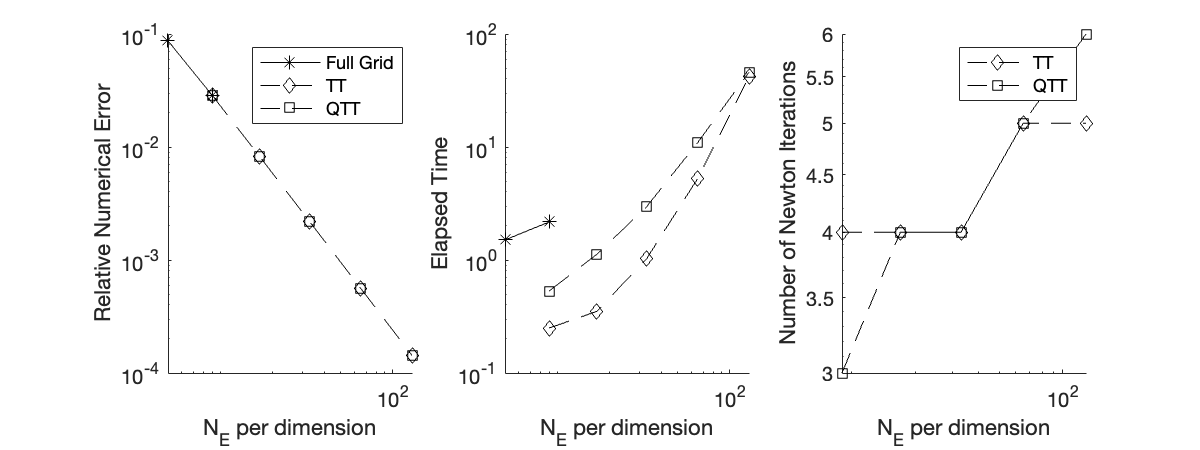

In [64]:
%%
testname='3D_nonlinear';

fgdata = load(sprintf('plot_data/FG_%s.mat',testname));
ttdata = load(sprintf('plot_data/TT_%s.mat',testname));
qttdata = load(sprintf('plot_data/QTT_%s.mat',testname));

%% get plot data
%Ns
fgNs = fgdata.NEs;
ttNs = ttdata.NEs;
qttNs = qttdata.NEs;

% Error
fgerr = cellfun(@(c) c.error, fgdata.R);
tterr = cellfun(@(c) c.error, ttdata.R);
qtterr = cellfun(@(c) c.error, qttdata.R);

% Time
fgtime = cellfun(@(c) c.time, fgdata.R);
tttime = cellfun(@(c) c.time, ttdata.R);
qtttime = cellfun(@(c) c.time, qttdata.R);

%compression
Attcomp = cellfun(@(c) c.Agttcomp, ttdata.R);
Aqttcomp = cellfun(@(c) c.Agqttcomp, qttdata.R);

%compression
tt_ni = cellfun(@(c) c.NewtonIter, ttdata.R);
qtt_ni = cellfun(@(c) c.NewtonIter, qttdata.R);

%%
fgmrk = '-*k';
ttmrk = '--dk';
qttrmrk = '--sk';
% figure('Position',[347,591,1585,545])
figure()
grid on;
box on;
%%%%%
subplot(1,3,1) % Error
hold on;
plot(fgNs,fgerr,fgmrk,'DisplayName','Full Grid')
plot(ttNs,tterr,ttmrk,'DisplayName','TT')
plot(qttNs,qtterr,qttrmrk,'DisplayName','QTT')

%xl = [32,64];
%yl(1) = 3e-4;
%yl(2) = yl(1)/4;
%plot(xl,yl,'k');
%text(xl(2) +2,yl(2)- 1e-5,'2',FontSize=20)

xlabel(sprintf('N_E per dimension', Interpreter='latex'))
ylabel(sprintf('Relative Numerical Error',Interpreter='latex'))

set(gca, 'YScale','log','Xscale','log')
%set(gca,'XTick',[9,ttNs]);
legend('Full Grid','TT','QTT')
%%%%%
subplot(1,3,2) % Times
hold on;
plot(fgNs, fgtime, fgmrk,'DisplayName','Full Grid')
plot(ttNs, tttime, ttmrk,'DisplayName','TT')
plot(qttNs, qtttime, qttrmrk,'DisplayName','QTT')

xlabel(sprintf('N_E per dimension', Interpreter='latex'))
ylabel(sprintf('Elapsed Time',Interpreter='latex'))
set(gca, 'YScale','log','Xscale','log')
%set(gca,'XTick',[9,ttNs]);
%legend('Full Grid','TT','QTT')

%%%%%
subplot(1,3,3) % Times
hold on;
plot(ttNs, tt_ni, ttmrk,'DisplayName','TT')
plot(qttNs, qtt_ni, qttrmrk,'DisplayName','QTT')

xlabel(sprintf('N_E per dimension', Interpreter='latex'))
%ylabel(sprintf('Compression Ratio of Diffusion Operators',Interpreter='latex'))
ylabel(sprintf('Number of Newton Iterations',Interpreter='latex'))
set(gca, 'YScale','log','Xscale','log')
%set(gca,'XTick',[9,ttNs]);
legend('TT','QTT')



x0=10;
y0=10;
width=600;
height=225;
set(gcf,'position',[x0,y0,width,height])

saveas(gcf,sprintf('figures/%s.png',testname))